# Time Series Predict (_Split_Branches_) from a train as before 2020-07-31

By Vivian Zeng

U of Notre Dame

In [2]:
import pandas as pd

# Get the Data

In [3]:
%matplotlib inline

kaggle = pd.read_csv("kaggle.csv")
kaggle.head()

,Unnamed: 0,BusinessDate,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
0,1,2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
1,2,2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2,3,2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
3,4,2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
4,5,2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [4]:
kaggle=kaggle.drop(kaggle.columns[0], axis=1)
kaggle.head()

,BusinessDate,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
0,2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
1,2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2,2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
3,2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
4,2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [5]:
kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171230 entries, 0 to 171229
Data columns (total 11 columns):
BusinessDate                   171230 non-null object
BranchID                       171230 non-null int64
CashOrdersReceived             171230 non-null float64
CashBalance_StartOfDay         168463 non-null float64
TotalCashUsed                  171230 non-null float64
CashToVault                    171230 non-null float64
CashUnder                      171230 non-null float64
CashOver                       171230 non-null float64
TotalCashDisbursed             171230 non-null float64
TotalCashOpeningBalance        168463 non-null float64
TotalCashReceivedAllSources    171230 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 14.4+ MB


In [6]:
# Convert date to a datetime object
kaggle.BusinessDate = pd.to_datetime(kaggle.BusinessDate)
kaggle.head()

,BusinessDate,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
0,2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
1,2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2,2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
3,2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
4,2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [7]:
kaggle[['BusinessDate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171230 entries, 0 to 171229
Data columns (total 1 columns):
BusinessDate    171230 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.3 MB


In [8]:
# Set date to be index
kaggle.set_index('BusinessDate', inplace = True)
kaggle.index

DatetimeIndex(['2020-07-31', '2020-07-30', '2020-07-29', '2020-07-28',
               '2020-07-27', '2020-07-26', '2020-07-25', '2020-07-24',
               '2020-07-23', '2020-07-22',
               ...
               '2010-01-10', '2010-01-09', '2010-01-08', '2010-01-07',
               '2010-01-06', '2010-01-05', '2010-01-04', '2010-01-03',
               '2010-01-02', '2010-01-01'],
              dtype='datetime64[ns]', name='BusinessDate', length=171230, freq=None)

In [9]:
kaggle.head()

,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
BusinessDate,,,,,,,,,,
2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


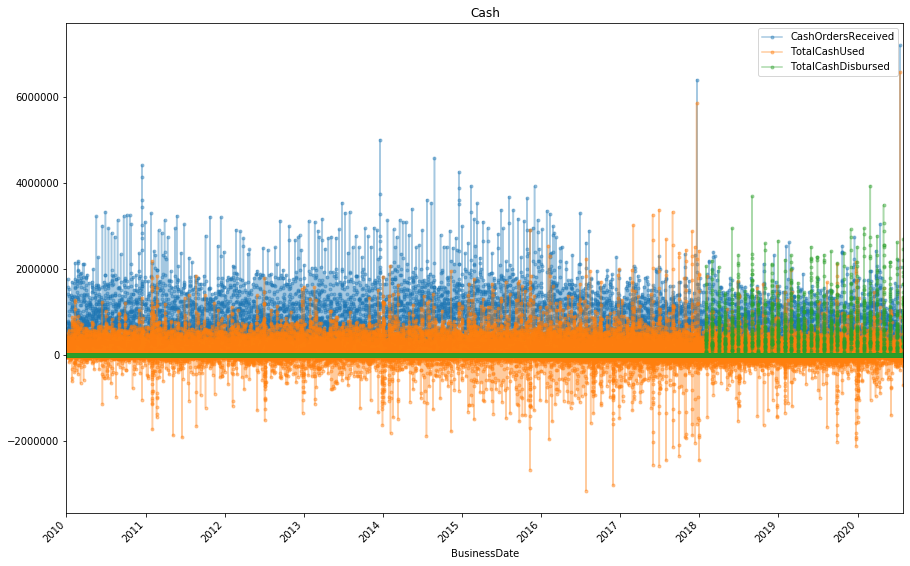

In [10]:
# Plot the some cash columns
%matplotlib inline
kaggle[['CashOrdersReceived', 
         'TotalCashUsed', 
         'TotalCashDisbursed']].plot(rot = 45, 
                                figsize = (15, 10), 
                                marker = ".", 
                                alpha = 0.4,
                                title = "Cash")

In [11]:
# Some verage monthly cash columns
#kaggle.resample('M').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

In [12]:
# Average CashOrdersReceived based on year
#kaggle.resample('Y').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

In [13]:
# Average CashOrdersReceived based on month
#kaggle.resample('M').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

In [14]:
# Average CashOrdersReceived based on quarter
#kaggle.resample('3M').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

# Setup train datasets

In [19]:
kaggle.head(2)

,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
BusinessDate,,,,,,,,,,
2020-07-31,99,0.0,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
2020-07-30,99,0.0,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00


# Set train based on the entire dataframe

In [16]:
# Extract data from '2010-01-01' to '2020-07-31' as train
train=kaggle.loc['2010-01-01':'2020-07-31']

In [18]:
train.head(2)

,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
BusinessDate,,,,,,,,,,
2020-07-31,99,0.0,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
2020-07-30,99,0.0,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00


In [20]:
# Reset the index to bring date in as column
train.reset_index(inplace = True)
train.head(2)

,BusinessDate,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
0,2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
1,2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2,2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
3,2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
4,2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [21]:
print (train.BusinessDate.min())
print (train.BusinessDate.max())

2010-01-01 00:00:00
2020-07-31 00:00:00


In [22]:
# Extract only the variables of interest
train = train[['BusinessDate', 'BranchID','TotalCashUsed']]
train.head()

,BusinessDate,BranchID,TotalCashUsed
0,2020-07-31,99,-43718.13
1,2020-07-30,99,261410.14
2,2020-07-29,99,104922.70
3,2020-07-28,99,124024.48
4,2020-07-27,99,59077.37


In [23]:
# Rename the columns as necessary
train.rename({'BusinessDate': 'ds', 'TotalCashUsed':'y'}, 
             axis = 'columns',
             inplace = True)
train.head()

,ds,BranchID,y
0,2020-07-31,99,-43718.13
1,2020-07-30,99,261410.14
2,2020-07-29,99,104922.70
3,2020-07-28,99,124024.48
4,2020-07-27,99,59077.37


In [24]:
# Import Prophet
from fbprophet import Prophet
import plotly

# Create a new Prophet object
model = Prophet(yearly_seasonality=True, daily_seasonality=True)
print(model)

# Fit the model to the historical data
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [25]:
# Create DataFrame with future dates to predict at (08-01-2020 to 11-30-2020, 122 days in total)
future = model.make_future_dataframe(periods=122)
future.tail()

,ds
171347,2020-11-26
171348,2020-11-27
171349,2020-11-28
171350,2020-11-29
171351,2020-11-30


In [26]:
# Make predictions for next 122 days
#forecast = model.predict(future)
#forecast.head()

ds - the timestamps

yhat - the predictions

yhat_lower - the lower bound of the prediction interval

yhat_upper - the upper bound of the prediction interval

In [27]:
# Extract the desired components
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [28]:
# Plot the model fit and predictions
# forecast_plot = model.plot(forecast, 
                           # xlabel = 'Time', 
                           # ylabel = 'Cash')

In [29]:
#forecast['weekday_name'] = forecast['ds'].dt.day_name()
#forecast.head()

In [30]:
# Decompose the time-series into Seasonal and Non-Seasonal components
#components_plot = model.plot_components(forecast)

## Set train based on Covid time frame

In [31]:
# Extract data from '2020-01-01' to '2020-07-31' as train
train_covid=kaggle.loc['2020-01-01':'2020-07-31']

In [32]:
# Reset the index to bring date in as column
train_covid.reset_index(inplace = True)
train_covid.head()

,BusinessDate,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
0,2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
1,2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2,2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
3,2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
4,2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [33]:
print (train_covid.BusinessDate.min())
print (train_covid.BusinessDate.max())

2020-01-01 00:00:00
2020-07-31 00:00:00


In [34]:
# Extract only the variables of interest
train_covid = train_covid[['BusinessDate', 'BranchID','TotalCashUsed']]
train_covid.head()
# Rename the columns as necessary
train_covid.rename({'BusinessDate': 'ds', 'TotalCashUsed':'y'}, 
             axis = 'columns',
             inplace = True)
train_covid.head()

,ds,BranchID,y
0,2020-07-31,99,-43718.13
1,2020-07-30,99,261410.14
2,2020-07-29,99,104922.70
3,2020-07-28,99,124024.48
4,2020-07-27,99,59077.37


In [35]:
print (train_covid.ds.min())
print (train_covid.ds.max())

2020-01-01 00:00:00
2020-07-31 00:00:00


In [36]:
#from fbprophet import Prophet
#import plotly

# Create a new Prophet object
model_covid = Prophet(yearly_seasonality=True, daily_seasonality=True)
print(model_covid)

# Fit the model to the historical data
model_covid.fit(train_covid)

In [37]:
future_covid = model_covid.make_future_dataframe(periods=122)
future_covid.tail(2)

,ds
10557,2020-11-29
10558,2020-11-30


In [38]:
# Make predictions for next 122 days
#forecast_covid = model_covid.predict(future_covid)
#forecast_covid.head()

In [39]:
#print (forecast_covid.ds.min())
#print (forecast_covid.ds.max())
# Extract the desired components
# forecast_covid[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [40]:
# Extract the desired components
# forecast_covid[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [41]:
# Plot the model fit and predictions
#forecast_covid_plot = model_covid.plot(forecast_covid, 
                                       #xlabel = 'Time', 
                                       #ylabel = 'Cash')

## Compare the predicts based on train and train_covid

In [42]:
# Plot the some cash columns
#%matplotlib inline
#forecast.tail(300).yhat.plot(rot = 45, 
                                #figsize = (15, 10), 
                                #marker = ".", 
                                #alpha = 0.4,
                                #title = "Cash based on All")

In [43]:
# Plot the some cash columns
# %matplotlib inline
#forecast_covid.tail(300).yhat.plot(rot = 45, 
                                #figsize = (15, 10), 
                                #marker = ".", 
                                #alpha = 0.4,
                                #title = "Cash based on Covid")

# Dig into EDA for data during covid time frame

In [71]:
#covid=kaggle.loc['2020-01-01':'2020-07-31']

In [72]:
#kaggle.head()

In [73]:
#covid.head()

,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
BusinessDate,,,,,,,,,,
2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [44]:
# Plot the some cash columns
#%matplotlib inline
#covid[['TotalCashUsed']].plot(rot = 45, 
                                #figsize = (15, 10), 
                                #marker = ".", 
                                #alpha = 0.4,
                                #title = "Cash")

In [81]:
# Some average monthly cash columns
#covid.resample('M').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

In [82]:
# Some average weekly cash columns
#covid.resample('W').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

In [83]:
# Some average 3d cash columns
#covid.resample('3d').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

# EDA for mixed pure covid and nomal train data

In [45]:
normal_covid=kaggle.loc['2019-01-01':'2020-07-31']

In [46]:
# Some average 3d cash columns
#normal_covid.resample('3d').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

In [47]:
# Some average week cash columns
#normal_covid.resample('w').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

In [48]:
# Plot the some cash columns
#%matplotlib inline
#normal_covid[['TotalCashUsed']].plot(rot = 45, 
                                #figsize = (15, 10), 
                                #marker = ".", 
                                #alpha = 0.4,
                                #title = "Cash")

# Predict based on mixed train based on normal and covid train

In [49]:
# Reset the index to bring date in as column
normal_covid.reset_index(inplace = True)
normal_covid.head()
# Extract only the variables of interest
normal_covid_train = normal_covid[['BusinessDate', 'BranchID','TotalCashUsed']]
normal_covid_train.head()

,BusinessDate,BranchID,TotalCashUsed
0,2020-07-31,99,-43718.13
1,2020-07-30,99,261410.14
2,2020-07-29,99,104922.70
3,2020-07-28,99,124024.48
4,2020-07-27,99,59077.37


In [51]:
# Rename the columns as necessary
normal_covid_train.rename({'BusinessDate': 'ds', 'TotalCashUsed':'y'}, 
             axis = 'columns',
             inplace = True)
normal_covid_train.head()

,ds,BranchID,y
0,2020-07-31,99,-43718.13
1,2020-07-30,99,261410.14
2,2020-07-29,99,104922.70
3,2020-07-28,99,124024.48
4,2020-07-27,99,59077.37


In [54]:
# Create a new Prophet object
model_nc = Prophet(yearly_seasonality=True, daily_seasonality=True)
print(model_nc)

# Fit the model to the historical data
model_nc.fit(normal_covid_train)

In [55]:
# Create DataFrame with future dates to predict at (08-01-2020 to 11-30-2020, 122 days in total)
future_nc = model_nc.make_future_dataframe(periods=122)
future_nc.tail(2)

,ds
28372,2020-11-29
28373,2020-11-30


In [57]:
# Make predictions for next 122 days
#forecast_nc = model_nc.predict(future_nc)
#forecast_nc.head()

In [58]:
# Plot the model fit and predictions
#forecast_plot = model_nc.plot(forecast_nc, 
                           #xlabel = 'Time', 
                           #ylabel = 'Cash')

In [59]:
# Plot the some cash columns
#%matplotlib inline
#forecast_nc.tail(300).yhat.plot(rot = 45, 
                                #figsize = (15, 10), 
                                #marker = ".", 
                                #alpha = 0.4,
                                #title = "Cash based on mixture of covid and normal")

In [60]:
# Plot the some cash columns
#%matplotlib inline
#forecast.tail(300).yhat.plot(rot = 45, 
                                #figsize = (15, 10), 
                                #marker = ".", 
                                #alpha = 0.4,
                                #title = "Cash based on All")

In [61]:
#forecast.yhat.describe()

In [62]:
#forecast_nc.yhat.describe()

# Forcasting based on BranchID

## Train based on entire time frame

In [65]:
df = train.groupby('BranchID').filter(lambda x: len(x) > 2)

df.BranchID = df.BranchID.astype(str)

final = pd.DataFrame(columns=['BranchID','ds','yhat'])

grouped = df.groupby('BranchID')
for g in grouped.groups:
    group = grouped.get_group(g)
    m = Prophet(yearly_seasonality=True, daily_seasonality=True)
    m.fit(group)
    future = m.make_future_dataframe(periods=122)
    forecast = m.predict(future)
    #I added a column with BranchID id
    forecast['BranchID'] = g
    #I used concat instead of merge
    final = pd.concat([final, forecast], ignore_index=True)

final.head(10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,BranchID,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,ds,multiplicative_terms,multiplicative_terms_lower,...,trend_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat,yhat_lower,yhat_upper
0,108,37416.669224,37416.669224,37416.669224,67670.607274,67670.607274,67670.607274,2010-01-01,0.0,0.0,...,41049.577185,-11124.031256,-11124.031256,-11124.031256,-19129.906794,-19129.906794,-19129.906794,78466.246409,-70158.157891,218184.653430
1,108,-42906.745599,-42906.745599,-42906.745599,67670.607274,67670.607274,67670.607274,2010-01-02,0.0,0.0,...,41039.221181,-88852.594690,-88852.594690,-88852.594690,-21724.758183,-21724.758183,-21724.758183,-1867.524418,-145312.623977,137960.594146
2,108,8487.982458,8487.982458,8487.982458,67670.607274,67670.607274,67670.607274,2010-01-03,0.0,0.0,...,41028.865178,-35204.279721,-35204.279721,-35204.279721,-23978.345095,-23978.345095,-23978.345095,49516.847635,-102435.705252,194933.353801
3,108,12556.630730,12556.630730,12556.630730,67670.607274,67670.607274,67670.607274,2010-01-04,0.0,0.0,...,41018.509174,-29248.435081,-29248.435081,-29248.435081,-25865.541463,-25865.541463,-25865.541463,53575.139904,-80532.461788,193963.821843
4,108,72794.050919,72794.050919,72794.050919,67670.607274,67670.607274,67670.607274,2010-01-05,0.0,0.0,...,41008.153171,32493.093467,32493.093467,32493.093467,-27369.649822,-27369.649822,-27369.649822,113802.204090,-24639.563851,249446.212843
5,108,49226.883820,49226.883820,49226.883820,67670.607274,67670.607274,67670.607274,2010-01-06,0.0,0.0,...,40997.797167,10038.812714,10038.812714,10038.812714,-28482.536168,-28482.536168,-28482.536168,90224.680987,-56322.693460,233044.803583
6,108,160363.492525,160363.492525,160363.492525,67670.607274,67670.607274,67670.607274,2010-01-07,0.0,0.0,...,40987.441163,121897.434566,121897.434566,121897.434566,-29204.549315,-29204.549315,-29204.549315,201350.933688,66443.604586,344765.677320
7,108,27002.345359,27002.345359,27002.345359,67670.607274,67670.607274,67670.607274,2010-01-08,0.0,0.0,...,40977.085160,-11124.031256,-11124.031256,-11124.031256,-29544.230659,-29544.230659,-29544.230659,67979.430519,-82608.847473,208476.020680
8,108,-50699.813188,-50699.813188,-50699.813188,67670.607274,67670.607274,67670.607274,2010-01-09,0.0,0.0,...,40966.729156,-88852.594690,-88852.594690,-88852.594690,-29517.825771,-29517.825771,-29517.825771,-9733.084031,-147726.696723,141114.249577
9,108,3317.713231,3317.713231,3317.713231,67670.607274,67670.607274,67670.607274,2010-01-10,0.0,0.0,...,40956.373153,-35204.279720,-35204.279720,-35204.279720,-29148.614322,-29148.614322,-29148.614322,44274.086384,-104427.667503,186005.274126


In [67]:
print (final.ds.min())
print (final.ds.max())

2010-01-01 00:00:00
2020-11-30 00:00:00


In [80]:
final.shape

(177208, 23)

In [84]:
final['future']=0
final.head()

,BranchID,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,ds,multiplicative_terms,multiplicative_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat,yhat_lower,yhat_upper,future
0,108,37416.669224,37416.669224,37416.669224,67670.607274,67670.607274,67670.607274,2010-01-01,0.0,0.0,...,-11124.031256,-11124.031256,-11124.031256,-19129.906794,-19129.906794,-19129.906794,78466.246409,-70158.157891,218184.653430,0
1,108,-42906.745599,-42906.745599,-42906.745599,67670.607274,67670.607274,67670.607274,2010-01-02,0.0,0.0,...,-88852.594690,-88852.594690,-88852.594690,-21724.758183,-21724.758183,-21724.758183,-1867.524418,-145312.623977,137960.594146,0
2,108,8487.982458,8487.982458,8487.982458,67670.607274,67670.607274,67670.607274,2010-01-03,0.0,0.0,...,-35204.279721,-35204.279721,-35204.279721,-23978.345095,-23978.345095,-23978.345095,49516.847635,-102435.705252,194933.353801,0
3,108,12556.630730,12556.630730,12556.630730,67670.607274,67670.607274,67670.607274,2010-01-04,0.0,0.0,...,-29248.435081,-29248.435081,-29248.435081,-25865.541463,-25865.541463,-25865.541463,53575.139904,-80532.461788,193963.821843,0
4,108,72794.050919,72794.050919,72794.050919,67670.607274,67670.607274,67670.607274,2010-01-05,0.0,0.0,...,32493.093467,32493.093467,32493.093467,-27369.649822,-27369.649822,-27369.649822,113802.204090,-24639.563851,249446.212843,0


In [88]:
final.iloc[-122:,].future=1

In [90]:
#Extract the desired components
final[['BranchID', 'ds', 'yhat', 'yhat_lower', 'yhat_upper', 'future']].tail()

,BranchID,ds,yhat,yhat_lower,yhat_upper,future
177203,99,2020-11-26,183791.654755,70966.702423,294446.070887,1
177204,99,2020-11-27,59516.918597,-53795.234213,183974.126189,1
177205,99,2020-11-28,191.546763,-117051.577822,110858.495306,1
177206,99,2020-11-29,18585.598883,-94979.702776,137120.248137,1
177207,99,2020-11-30,48367.037126,-55722.111737,164308.996183,1


In [78]:
len(final.BranchID.unique())

49

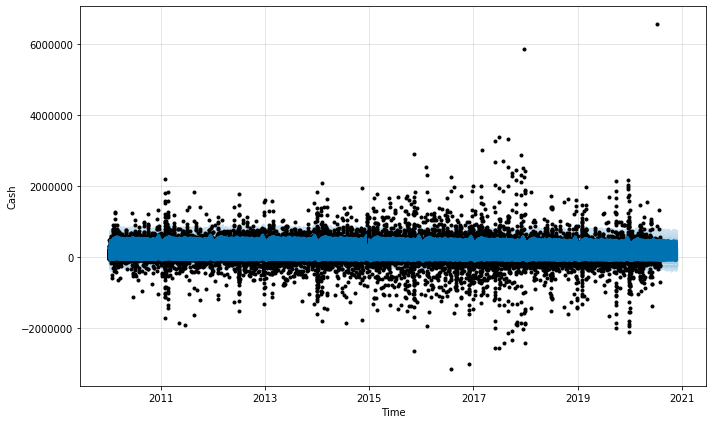

In [73]:
forecast_plot = model.plot(final,
                           xlabel = 'Time', 
                           ylabel = 'Cash')

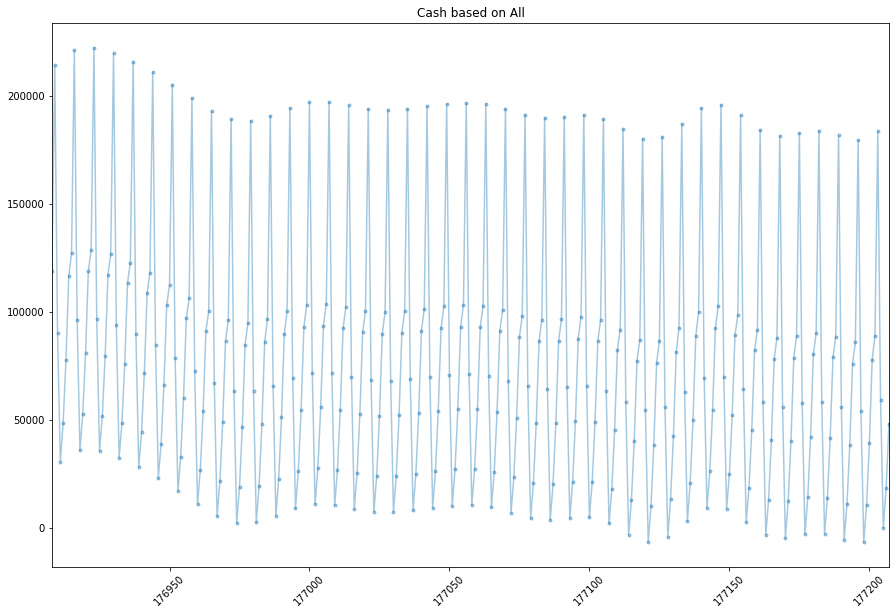

In [152]:
%matplotlib inline
final.tail(300).yhat.plot(rot = 45, 
                          figsize = (15, 10),
                          marker = ".",
                          alpha = 0.4,
                          title = "Cash based on All")

In [97]:
from matplotlib import pyplot as plt

In [145]:
#fig = plt.figure(figsize=(15,10))
#fig.set_dpi(300)

#present_data = final.loc[final['future'] == 0]
#future_data = final.loc[final['future'] == 1]

#present_data.groupby('BranchID')['yhat'].plot(legend='True')
#future_data.groupby('BranchID')['yhat'].plot(style='--')

#plt.legend(loc='center left', ncol=5, bbox_to_anchor=(1, 0.5), fancybox=True)
#plt.show()

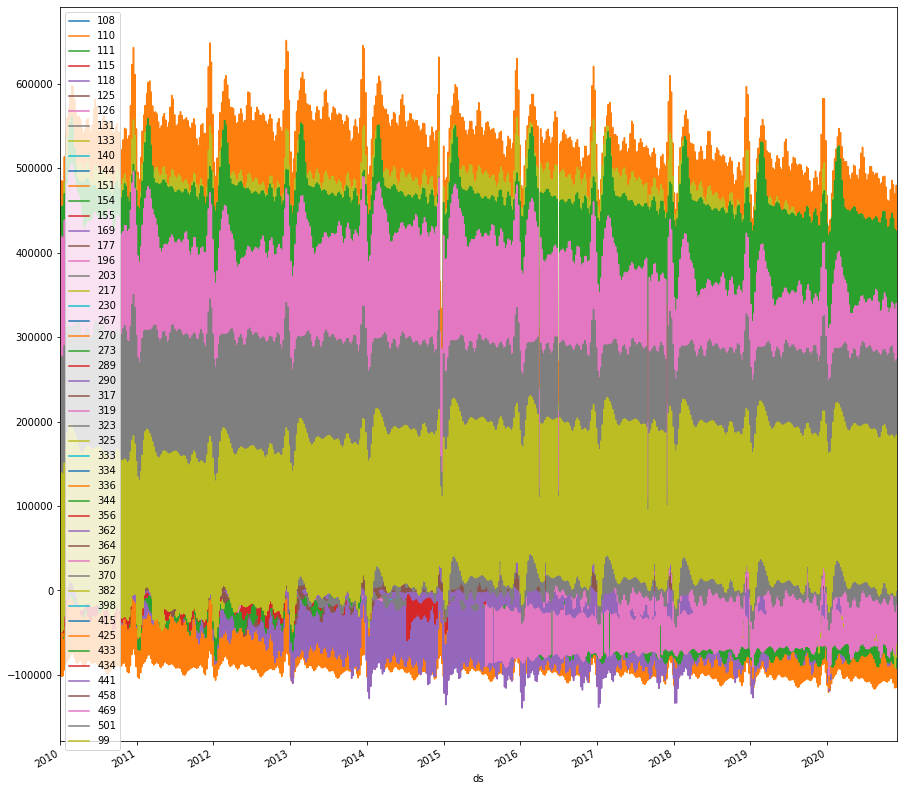

In [153]:
fig, ax = plt.subplots(figsize=(15,15))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for key, data in final.groupby('BranchID'):
    data.plot(x='ds', y='yhat', ax=ax, label=key)
    

In [125]:
final.groupby('BranchID').yhat.describe()

,count,mean,std,min,25%,50%,75%,max
BranchID,,,,,,,,
108,3948.0,88748.064487,62875.839039,-45930.350109,50891.265446,79112.276946,116160.755771,254923.317741
110,3951.0,41019.204493,78337.686028,-120639.013418,4002.812606,33457.125517,122321.530775,184877.109940
111,3948.0,70174.361659,75766.100614,-56352.277798,14255.394999,46787.182795,108534.976384,263074.210759
115,3948.0,64610.061180,58317.535350,-35223.662120,31099.528509,53242.997235,70689.421627,221115.388855
118,3959.0,73344.975039,103331.520877,-139338.125182,8094.509338,64817.282720,111889.672780,388633.658433
125,3112.0,87021.232546,70941.582707,-54357.069806,44890.688580,68817.136192,121819.069767,274675.804036
126,2840.0,12262.571140,13393.778990,-14912.373988,2924.649224,12236.819878,19515.340421,42405.554885
131,3948.0,35713.249945,27828.511484,-28331.225563,16758.675046,32373.364910,48919.428214,116281.105366
133,3948.0,66460.534586,52000.812147,-37140.383929,37028.484657,55266.067339,82802.702936,216083.019734
